Probamos modelo con Regresion Lineal


In [3]:
#importamos las librerias necesarias

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_hospitalizaciones_test = pd.read_csv("hospitalizaciones_test.csv")
df_hospitalizaciones_test.head() #leemos el csv como dataframe

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [5]:
df_hospitalizaciones_train = pd.read_csv("hospitalizaciones_train.csv")
df_hospitalizaciones_train.head() #leemos el csv como dataframe

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
df_hospitalizaciones_train.loc[df_hospitalizaciones_train['Stay (in days)'] <= 8, 'Stay'] = 0
df_hospitalizaciones_train.loc[df_hospitalizaciones_train['Stay (in days)'] > 8, 'Stay'] = 1

df_hospitalizaciones_train.loc[df_hospitalizaciones_train['Insurance'] == 'Yes', 'Insurance_bi'] = 1
df_hospitalizaciones_train.loc[df_hospitalizaciones_train['Insurance'] == 'No', 'Insurance_bi'] = 0

In [7]:
df_hospitalizaciones_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Stay,Insurance_bi
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0.0,1.0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,1.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0.0,1.0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,1.0,0.0


In [8]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.

from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [9]:
df_hospitalizaciones_train['Department_le'] = le.fit_transform(df_hospitalizaciones_train['Department'])
df_hospitalizaciones_train['gender_le'] = le.fit_transform(df_hospitalizaciones_train['gender'])
df_hospitalizaciones_train['Type of Admission_le'] = le.fit_transform(df_hospitalizaciones_train['Type of Admission'])
df_hospitalizaciones_train['Severity of Illness_le'] = le.fit_transform(df_hospitalizaciones_train['Severity of Illness'])
df_hospitalizaciones_train['health_conditions_le'] = le.fit_transform(df_hospitalizaciones_train['health_conditions'])
df_hospitalizaciones_train['Age_le'] = le.fit_transform(df_hospitalizaciones_train['Age'])
df_hospitalizaciones_train['doctor_name_le'] = le.fit_transform(df_hospitalizaciones_train['doctor_name'])

In [10]:
#analizamos la correlacion entre las features

df_hospitalizaciones_train_corr = df_hospitalizaciones_train.corr()



C:\Users\HP\AppData\Local\Temp\ipykernel_15372\2537083371.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hospitalizaciones_train_corr = df_hospitalizaciones_train.corr()


In [11]:
df_hospitalizaciones_train_corr

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Stay,Insurance_bi,Department_le,gender_le,Type of Admission_le,Severity of Illness_le,health_conditions_le,Age_le,doctor_name_le
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,0.071073,-0.050775,-0.019383,0.053894,0.002438,-0.021235,-0.038214,0.020866,0.024045,0.001643,-0.029921,0.015253
staff_available,-0.003064,1.000000,-0.000350,0.001444,0.000816,0.006673,0.002883,0.001245,0.016304,0.003960,-0.002255,0.002759,-0.001500,0.001818,-0.001162
patientid,-0.005426,-0.000350,1.000000,-0.006393,0.011602,0.005567,-0.000532,0.001827,0.002997,0.010714,0.022615,-0.011138,0.002306,0.009765,-0.007540
Visitors with Patient,0.071073,0.001444,-0.006393,1.000000,-0.069566,0.027284,-0.009529,0.025426,-0.034597,0.048435,-0.020353,0.030199,-0.000117,0.030136,-0.039543
Admission_Deposit,-0.050775,0.000816,0.011602,-0.069566,1.000000,0.043899,-0.016650,0.001164,-0.009166,0.038189,0.016885,0.005637,0.000412,0.016743,-0.023484
Stay (in days),-0.019383,0.006673,0.005567,0.027284,0.043899,1.000000,0.493378,-0.000947,-0.204050,0.589757,0.035811,0.024316,0.001772,0.585201,-0.444867
Stay,0.053894,0.002883,-0.000532,-0.009529,-0.016650,0.493378,1.000000,-0.001063,-0.173021,0.193878,0.006233,0.017030,-0.002568,0.229657,-0.172526
Insurance_bi,0.002438,0.001245,0.001827,0.025426,0.001164,-0.000947,-0.001063,1.000000,-0.000714,0.001657,-0.002062,0.001924,0.008702,-0.002472,-0.003544
Department_le,-0.021235,0.016304,0.002997,-0.034597,-0.009166,-0.204050,-0.173021,-0.000714,1.000000,0.016474,-0.037395,0.014698,-0.000344,0.013096,0.241001
gender_le,-0.038214,0.003960,0.010714,0.048435,0.038189,0.589757,0.193878,0.001657,0.016474,1.000000,0.031566,0.029147,-0.000242,0.497530,-0.420330


<AxesSubplot: >

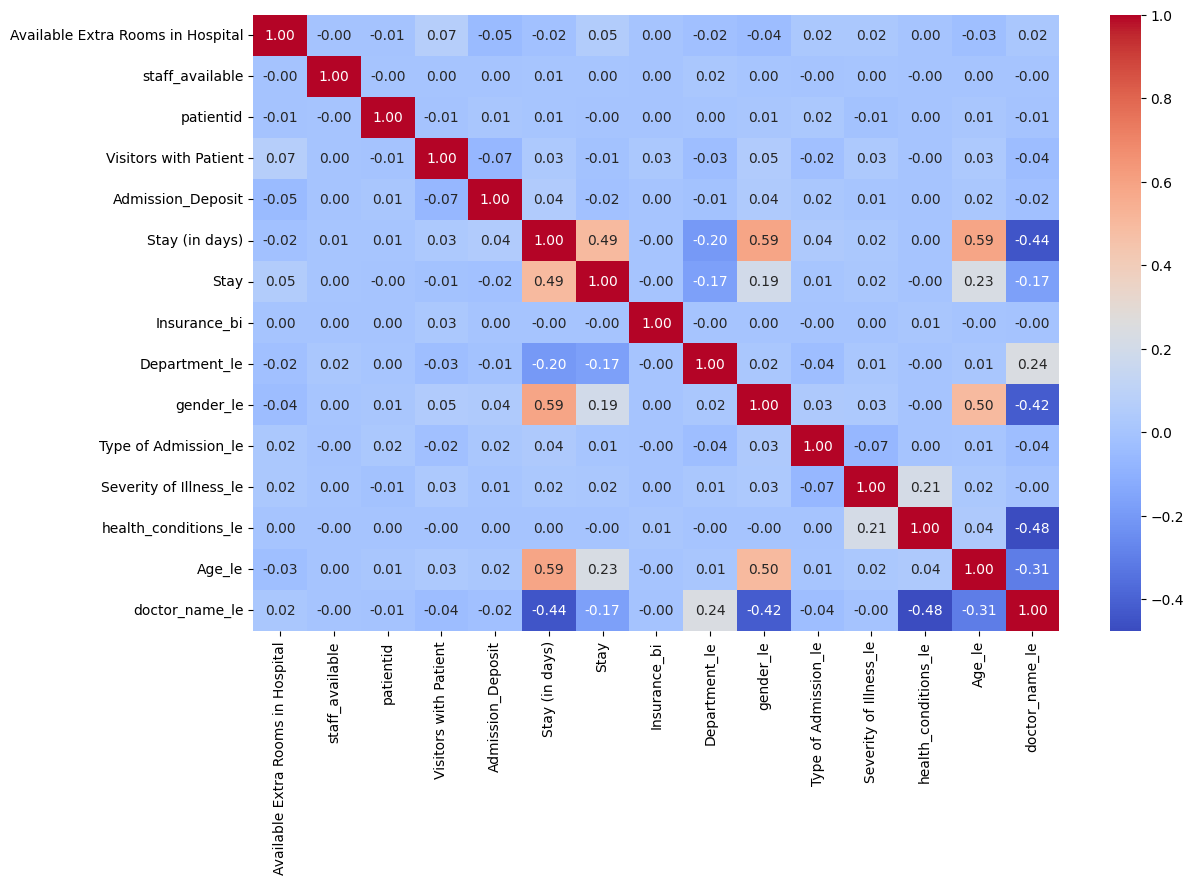

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(df_hospitalizaciones_train_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') #Graficamos las correlaciones con un mapa de calor


In [13]:
df_hospitalizaciones_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,...,Stay (in days),Stay,Insurance_bi,Department_le,gender_le,Type of Admission_le,Severity of Illness_le,health_conditions_le,Age_le,doctor_name_le
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,...,8,0.0,1.0,2,0,1,0,1,4,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,...,9,1.0,0.0,2,0,1,1,2,3,8
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,...,7,0.0,1.0,2,0,1,0,1,2,8
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,...,8,0.0,0.0,2,0,2,2,4,3,4
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,...,34,1.0,0.0,1,1,1,2,1,7,2


In [14]:
#declarando las features mas importantes
feature_cols_corr = df_hospitalizaciones_train[["Department_le", "Age_le", "gender_le","doctor_name_le","Stay"]].corr()


<AxesSubplot: >

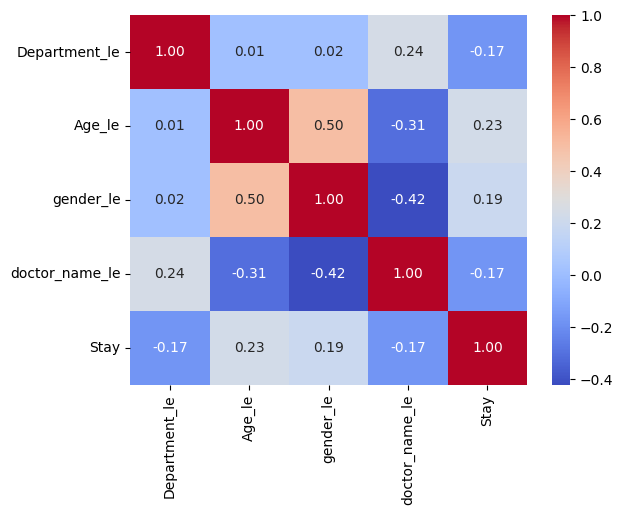

In [15]:
sns.heatmap(feature_cols_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm')

In [16]:
X3 = df_hospitalizaciones_train[["gender_le"]]
y = df_hospitalizaciones_train["Stay"]

Regresion Logistica

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [18]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X3,y)

LogisticRegression()

In [19]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. 
# Ya ahondaremos con mayor especificidad en las métricas de clasificación en la clase 3

from sklearn.metrics import accuracy_score 

# Predecimos

y_pred = clf.predict(X3)

# Evaluamos

print('El score del modelo es:', accuracy_score(y, y_pred))

El score del modelo es: 0.6229658536585366


In [20]:
from sklearn.metrics import r2_score 

r2 = r2_score(y, y_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: -0.6052244182040278


In [21]:
# Observamos los parámetros de la función sigmoide

print(clf.coef_, clf.intercept_)


[[0.84635971]] [0.27130499]


Probamos modelo de Clasificacion con K-Vecinos

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf2 = KNeighborsClassifier(n_neighbors=5)

In [23]:
X2 = df_hospitalizaciones_train[["Department_le","Age_le", "gender_le"]].head(100000)
y = df_hospitalizaciones_train["Stay"].head(100000)

In [24]:
# Entrenamos

clf2.fit(X2.values,y.values)

KNeighborsClassifier()

In [25]:
# Predecimos

y_pred = clf2.predict(X2.values)

In [26]:
print(accuracy_score(y,y_pred))

0.65998


In [27]:
r2 = r2_score(y, y_pred) 
print('El coeficiente de determinación del regresor es:', r2)

El coeficiente de determinación del regresor es: -0.44945764962515766


Probamos modelo con metodo de Clasificacion 
ARBOL DE DESICION

In [43]:
X = df_hospitalizaciones_train[["Department_le", "Age_le", "gender_le"]]
y = df_hospitalizaciones_train["Stay"]

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

In [45]:
# Entrenamos el modelo

clf3.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [46]:
# Predecimos

y_pred = clf3.predict(X.values)

In [47]:
from sklearn import tree

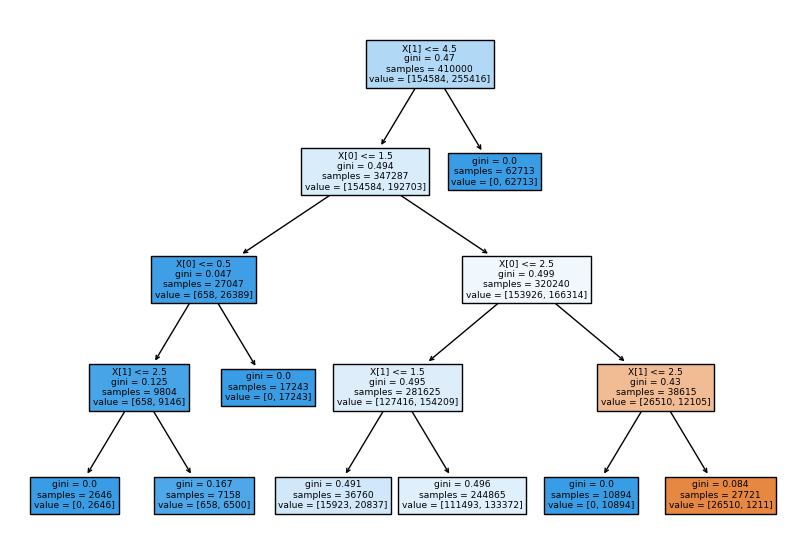

In [48]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf3, filled = True)
plt.show()

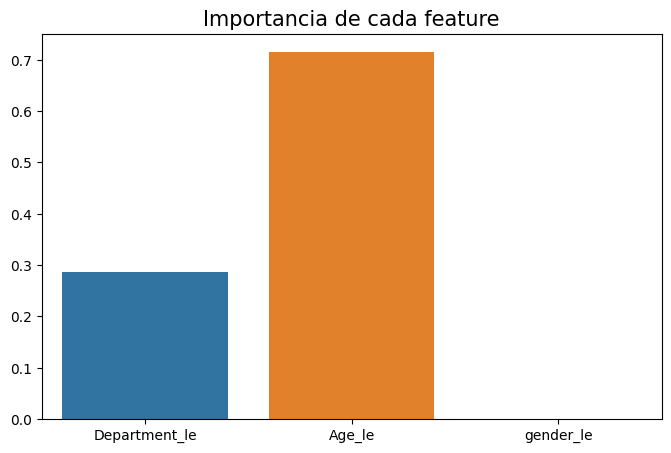

In [49]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf3.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

In [50]:
print(accuracy_score(y,y_pred))

r2 = r2_score(y, y_pred) 
print('El coeficiente de determinación del regresor es:', r2)

0.6846707317073171
El coeficiente de determinación del regresor es: -0.3425156478517035


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42, stratify=y)

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


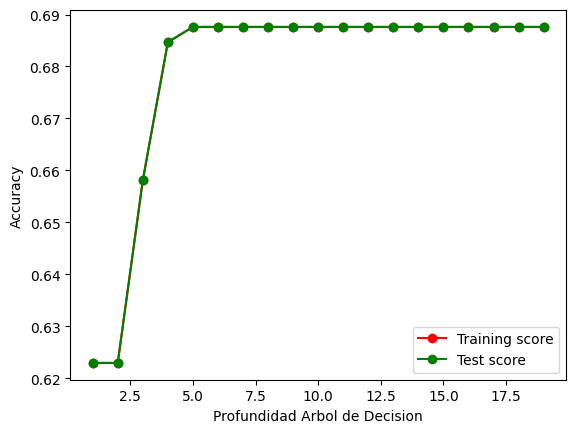

In [52]:
#Evaluamos la profundidad optima
from sklearn.model_selection import cross_validate

tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf3 = DecisionTreeClassifier(max_depth=profundidad,random_state = 42)
    tree_scores = cross_validate(clf3, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    #clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [58]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19, random_state=42)

In [59]:
#Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf3.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = clf3.predict(X_test)

Realizamos la matriz de confusion del modelo

In [63]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

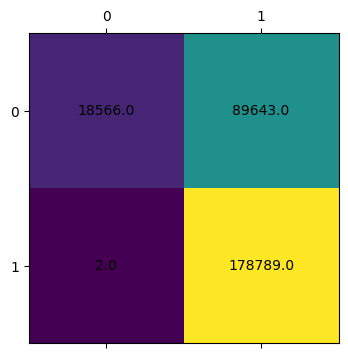

In [64]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

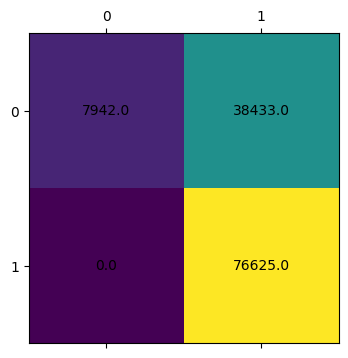

In [65]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix_2)
for (i, j), z in np.ndenumerate(matrix_2):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

Para hacer PAIRPLINE, encontrar y empaquetar el mejor modelo de prediccion 

In [67]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Creamos el primer pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [77]:
# Creamos el segundo pipeline

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', DecisionTreeClassifier(random_state=42))])

In [78]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_dt]

In [79]:
# Hacemos un diccionario para fines organizativos

pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [80]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [81]:
# Evaluamos

for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.589
Árbol de decisión pipeline accuracy en test: 0.688


In [82]:
# Identificamos el mejor modelo para el set de testeo

best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión


In [83]:
# Guardamos el pipeline en un archivo

import joblib #pickle es alternativa

joblib.dump(best_pipe, 'Mejor_pipeline.pkl', compress=1)
print('Pipeline de %s guardado a archivo' % pipe_dict[best_clf])

Pipeline de Árbol de decisión guardado a archivo


In [84]:
best_model = joblib.load('Mejor_pipeline.pkl')

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42, stratify=y)

In [85]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [86]:
best_model.score(X_test, y_test)

0.6875365853658536

Realizando un análisis sobre el modelo predictivo con mayor presición y buscando no caer en overfitting, es decir no sobreentrenar mi modelo, llegué a la conclusión de que el modelo mas certero es el de 'Arbol de Decicion' con una profundidad de 4 capas. Una vez realizado el análisis fué empaquetado en un Pipeline y realizada la predicción con el archivo de testeo a continuación, para predecir si un paciente tendrá una estancia hospitalaria prolongada o no.

In [87]:
df_hospitalizaciones_test = pd.read_csv('hospitalizaciones_test.csv') #Importe de datos

#Normalización de columnas tipo string, todo en minúsculas
for column in df_hospitalizaciones_test.columns:
    if df_hospitalizaciones_test[column].dtype == ('object'):
        df_hospitalizaciones_test[column]=df_hospitalizaciones_test[column].str.lower()

#Cambio de variables string a números
encoder = preprocessing.LabelEncoder()
for column in df_hospitalizaciones_test.columns:
    if df_hospitalizaciones_test[column].dtype != ('int64' or 'float'):
        df_hospitalizaciones_test[column]=encoder.fit_transform(df_hospitalizaciones_test[column])
df_hospitalizaciones_test

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,1,5,4,10,2858,2,0,1,2,5,2,0,52469
1,2,4,4,1,4,65657,5,0,1,2,0,2,1,24227
2,2,2,4,1,7,45598,5,2,1,2,4,3,0,75017
3,2,1,5,4,1,31132,2,0,1,2,4,2,1,19861
4,2,0,0,1,7,125021,5,0,1,0,1,2,0,53798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,4,1,5,6,2,43001,1,0,1,1,3,3,0,23729
89996,13,1,5,4,8,85601,3,0,0,2,5,2,0,45398
89997,2,1,1,6,3,22447,1,0,0,2,3,2,0,74998
89998,2,2,0,1,1,29957,6,0,1,0,1,2,0,49049


In [89]:
important_features = df_hospitalizaciones_test[["Department", "Age", "gender"]]
y = clf3.predict(important_features)

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [91]:
prediction = pd.DataFrame(y.reshape(-1,1), columns=['pred'])
prediction

,pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
89995,1.0
89996,1.0
89997,1.0
89998,1.0


In [93]:
prediction = prediction.astype('int64')

In [94]:
prediction.to_csv('belensendot.csv', index=False)